In [41]:
!pip install torch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Classe para nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    # A rede constituida neurônios de entrada, 17 neurônios para camada oculta e 3 neurônios para saída.
    # Rede neural densa pois os neurônios estão linermente conectados
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
  # Função de ativação dos neurônios
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [24]:
# Para aleatoriedade dos pesos dos neurônios
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Extração do dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
# Muda os nomes de flores para numeros
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.head(-50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [8]:
# Setando x e y dos treinamento
# X são todas a features (Amostras)
# Y é o tipo das plantas
X = my_df.drop('species', axis=1)
y = my_df['species']

In [9]:
# Convertendo para numpy arrays
X = X.values
y = y.values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [10]:
from sklearn.model_selection import train_test_split

In [26]:
# 80% do dataset será para treino da rede, o restante para testar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [27]:
# Converte X para tensor float, decimal
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [28]:
# Converte y para tensor long, inteiro
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [29]:
# Criando critério, este serve para classes, no caso irá comparar a classe da predição com a correta
criterion = nn.CrossEntropyLoss()
# Escolhendo um otimizador, Adam Optimizer = lr (learning rate) para minimizar a perda com gradiente
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [30]:
# Treinar o Modelo
# Interações
epochs = 100
losses = []
for i in range(epochs):
  # Vai para forward, passa por todas as camadas e faz uma predição
  y_pred = model.forward(X_train) #pegar predição dos resultados
  # Compara a predição com o real
  loss = criterion(y_pred, y_train) # Predito vs Verdadeiro
  # Mapeando o erro
  losses.append(loss.detach().numpy())
  # Print a cada 10 interações
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Backpropagation
  optimizer.zero_grad() # zera o gradiente para que o cálculo seja refeito a cada iteração
  # Na retropropagação (Backpropagation), o PyTorch calcula o gradiente da perda em relação a cada parâmetro (peso) da rede
  ## Determinando o quanto cada peso contribuiu para o erro (perda) total
  ### Esses gradientes são usados para ajustar os pesos da rede na direção que minimiza a função de perda
  loss.backward()
  # O otimizador Adam (definido anteriormente) usa os gradientes para ajustar os pesos em direção à minimização da função de perda
  ## Esse processo de atualização é conhecido como descida do gradiente
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'epochs')

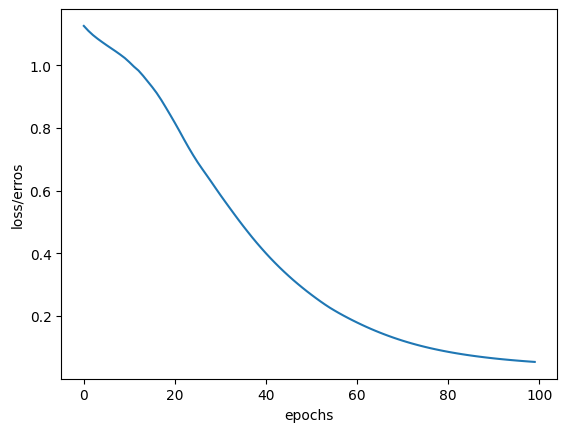

In [31]:
# Plot
plt.plot(range(epochs), losses)
plt.ylabel('loss/erros')
plt.xlabel('epochs')

In [32]:
# Avaliando o modelo
with torch.no_grad(): # Desligando back propagation
  y_eval = model.forward(X_test)
  # X_test são features do set de teste (20% do dataset)
  # y_eval serão as predições em cima de X_test
  loss = criterion(y_eval, y_test)
  # A predição de X_test feita pelo modelo comparando com y_test (verdadeiros valores de X_test)

In [33]:
loss

tensor(0.1315)

In [34]:
correct = 0
with torch.no_grad():
  for i, xsalada in enumerate(X_test):
    y_val = model.forward(xsalada)

    # Isso é o que a rede neural pensa que é
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Analisando se está correto
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'temos {correct} corretos')


1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [35]:
#Inserindo uma nova feature na rede
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [39]:
# Predição da rede já treinada
with torch.no_grad():
  print(model(new_iris))
  print(f'classe: {y_val.argmax().item()}')

tensor([-5.9944,  4.5077,  6.6792])
classe: 1


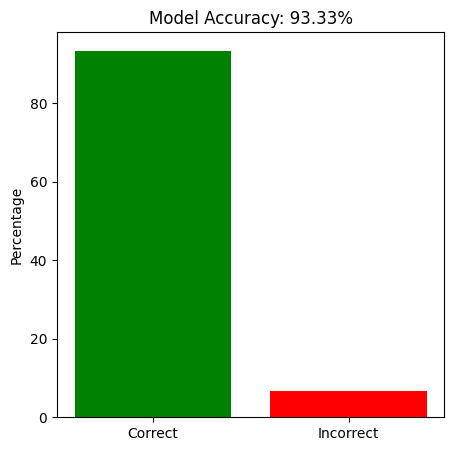

In [40]:
# Coletando as predições corretas e o total de predições
correct_predictions = correct
total_predictions = len(y_test)

# Calculando a acurácia
accuracy = (correct_predictions / total_predictions) * 100

# Plotar a acurácia
plt.figure(figsize=(5, 5))
plt.bar(['Correct', 'Incorrect'], [accuracy, 100 - accuracy], color=['green', 'red'])
plt.title(f'Model Accuracy: {accuracy:.2f}%')
plt.ylabel('Percentage')
plt.show()
